Saving retail_India.xlsx to retail_India (1).xlsx
Dataset Preview:
   Row ID Order Priority  Discount offered  Unit Price  Freight Expenses  \
0      64         Medium              0.08      124.49             51.94   
1      66           High              0.02        3.69              0.50   
2      67           High              0.09        3.85              0.70   
3     188           High              0.08        5.28              5.57   
4     224           High              0.07       65.99              8.99   

   Customer No Name of customer    Freight Mode             Segment  \
0          553           Skidoo  Delivery Truck  Hotels / Hospitals   
1         3289          Dabtype     Regular Air  Hotels / Hospitals   
2         3289          Dabtype     Regular Air  Hotels / Hospitals   
3         2491         Blogtags     Regular Air    Restaurant Chain   
4          308       Brightbean     Regular Air      Personel Usage   

     Product Type  ...       City Region  Country

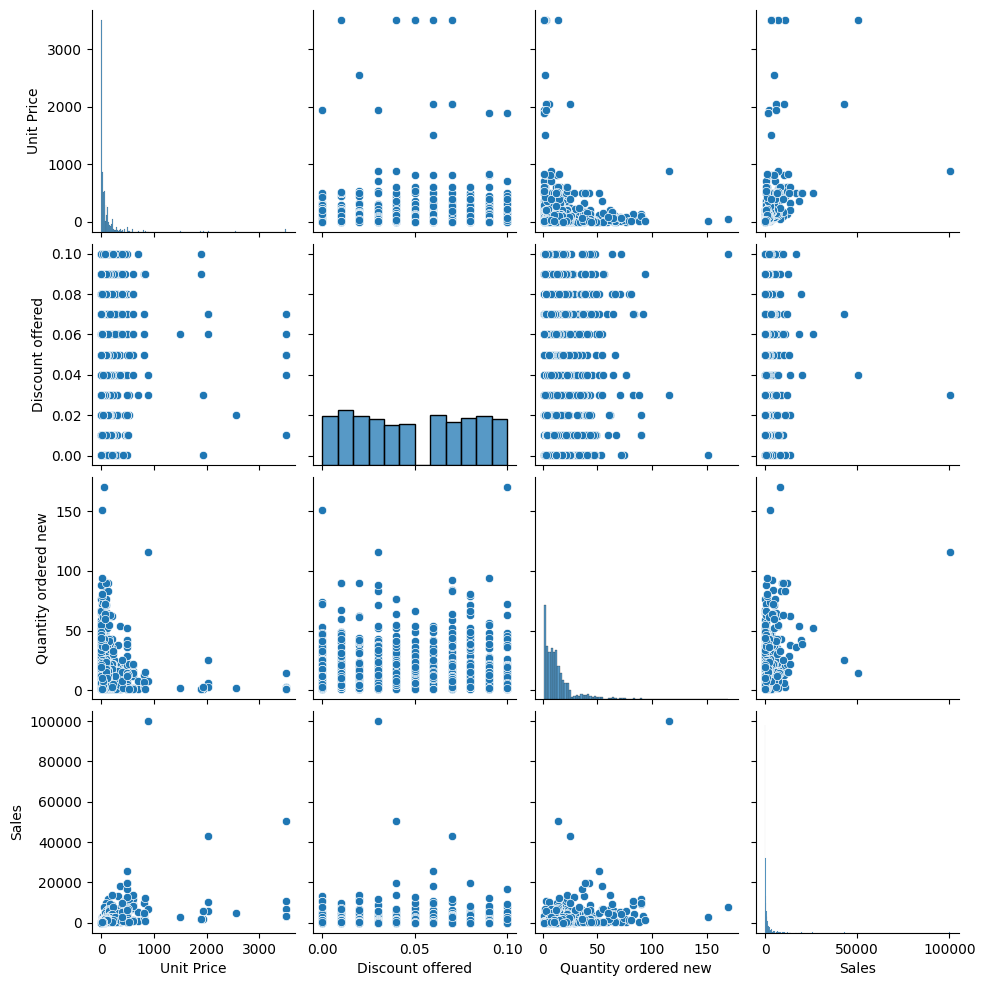

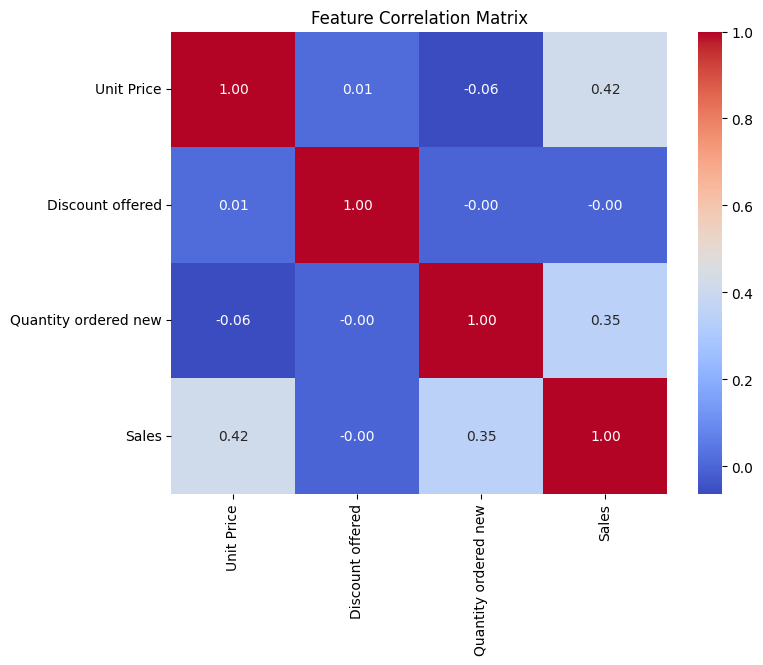


Model Coefficients:
Unit Price: 6.5333
Discount offered: -2157.0155
Quantity ordered new: 92.9351
Intercept: -704.8160

Model Performance Metrics:
Mean Absolute Error (MAE): 826.48
Mean Squared Error (MSE): 4071246.09
Root Mean Squared Error (RMSE): 2017.73
R-Squared (R²): -0.16

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     198.8
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          8.75e-105
Time:                        15:51:49   Log-Likelihood:                -11537.
No. Observations:                1212   AIC:                         2.308e+04
Df Residuals:                    1208   BIC:                         2.310e+04
Df Model:                           3                         

In [1]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Load dataset
from google.colab import files
uploaded = files.upload()

# Load the Excel file
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)

# Load raw data
df = pd.read_excel(xls, sheet_name='rawdata')

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Drop missing values for simplicity
df.dropna(inplace=True)

# Select relevant features and target variable
features = ['Unit Price', 'Discount offered', 'Quantity ordered new']
target = 'Sales'

# Ensure data types are numeric
df = df[features + [target]]
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Data Visualization
sns.pairplot(df)
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Splitting the dataset
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

# Statistical Summary using Statsmodels
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS Regression Results:")
print(ols_model.summary())


=== Correlation Heatmap Explanation ===
1. **Unit Price vs Sales (0.42):** Moderate positive correlation -> Higher price tends to increase sales revenue.
2. **Quantity Ordered vs Sales (0.35):** Moderate positive correlation -> More quantity ordered leads to higher sales.
3. **Discount Offered vs Sales (~0.00):** No significant correlation -> Discounts have little to no impact on sales.
4. **Unit Price vs Quantity Ordered (-0.06):** Weak negative correlation -> Higher prices may slightly reduce order quantity.

=== Pair Plot Explanation ===
1. **Unit Price Distribution:** Skewed towards lower values, indicating most products have a lower price.
2. **Discount Distribution:** Discounts are mostly within 0%-10%, spread evenly across different orders.
3. **Quantity Ordered vs Unit Price:** More expensive items tend to have lower quantities ordered.
4. **Sales vs Quantity Ordered:** Sales tend to increase with quantity, but some high-quantity orders don't generate high sales.
5. **Sales vs 

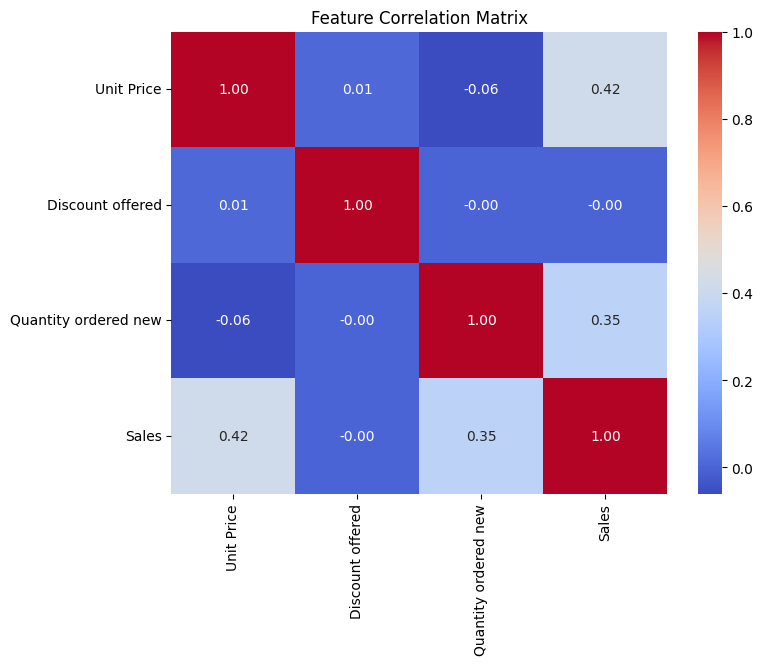

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample correlation data (Replace this with your actual data if available)
correlation_matrix = {
    "Unit Price": [1.00, 0.01, -0.06, 0.42],
    "Discount offered": [0.01, 1.00, -0.00, -0.00],
    "Quantity ordered new": [-0.06, -0.00, 1.00, 0.35],
    "Sales": [0.42, -0.00, 0.35, 1.00]
}

correlation_df = pd.DataFrame(correlation_matrix, index=["Unit Price", "Discount offered", "Quantity ordered new", "Sales"])

# Explaining the correlation heatmap
print("=== Correlation Heatmap Explanation ===")
print("1. **Unit Price vs Sales (0.42):** Moderate positive correlation -> Higher price tends to increase sales revenue.")
print("2. **Quantity Ordered vs Sales (0.35):** Moderate positive correlation -> More quantity ordered leads to higher sales.")
print("3. **Discount Offered vs Sales (~0.00):** No significant correlation -> Discounts have little to no impact on sales.")
print("4. **Unit Price vs Quantity Ordered (-0.06):** Weak negative correlation -> Higher prices may slightly reduce order quantity.")

# Pair plot interpretation
print("\n=== Pair Plot Explanation ===")
print("1. **Unit Price Distribution:** Skewed towards lower values, indicating most products have a lower price.")
print("2. **Discount Distribution:** Discounts are mostly within 0%-10%, spread evenly across different orders.")
print("3. **Quantity Ordered vs Unit Price:** More expensive items tend to have lower quantities ordered.")
print("4. **Sales vs Quantity Ordered:** Sales tend to increase with quantity, but some high-quantity orders don't generate high sales.")
print("5. **Sales vs Unit Price:** Higher unit price contributes to increased sales, but extreme outliers exist.")

# Display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
